In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import cm

In [2]:
#path = "/phone_clean.csv"
path = "/content/phone_clean.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Brand,Name,Status,Guarantee,Color,Capacity,Origin,Location,Price
0,xiaomi,redmi turbo 3,moi,>12 thang,mau khac,512.0,trung quoc,binh duong,5690000
1,oppo,f11,moi,2 thang,xanh duong,256.0,viet nam,tp ho chi minh,1250000
2,apple,iphone 6 plus,da su dung chua sua chua,het bao hanh,vang,64.0,my,tp ho chi minh,750000
3,samsung,galaxy a6,da su dung chua sua chua,bao hanh hang,vang hong,32.0,viet nam,tp ho chi minh,650000
4,xiaomi,dong khac,da su dung chua sua chua,het bao hanh,xanh duong,128.0,viet nam,tp ho chi minh,1500000
...,...,...,...,...,...,...,...,...,...
2375,samsung,galaxy s21,da su dung chua sua chua,con bao hanh,trang,256.0,han quoc,tp ho chi minh,4990000
2376,samsung,galaxy note 10 plus,da su dung chua sua chua,con bao hanh,xanh duong,256.0,han quoc,tp ho chi minh,5500000
2377,apple,iphone 12 pro max,da su dung chua sua chua,>12 thang,vang,128.0,my,dong nai,11990000
2378,samsung,galaxy a71,moi,het bao hanh,xanh la,128.0,viet nam,binh duong,1900000


In [5]:
df.dtypes

,0
Brand,object
Name,object
Status,object
Guarantee,object
Color,object
Capacity,float64
Origin,object
Location,object
Price,int64


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2380 non-null   object 
 1   Name       2380 non-null   object 
 2   Status     2380 non-null   object 
 3   Guarantee  2380 non-null   object 
 4   Color      2380 non-null   object 
 5   Capacity   2380 non-null   float64
 6   Origin     2380 non-null   object 
 7   Location   2380 non-null   object 
 8   Price      2380 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 167.5+ KB


,Capacity,Price
count,2380.000000,2.380000e+03
mean,171.092437,7.403910e+06
std,132.803558,6.611630e+06
min,8.000000,1.234500e+04
25%,64.000000,2.600000e+06
50%,128.000000,5.272779e+06
75%,256.000000,9.990000e+06
max,2048.000000,4.500000e+07


## Trực quan hóa dữ liệu

### so sánh giá trị trung bình theo dung lượng

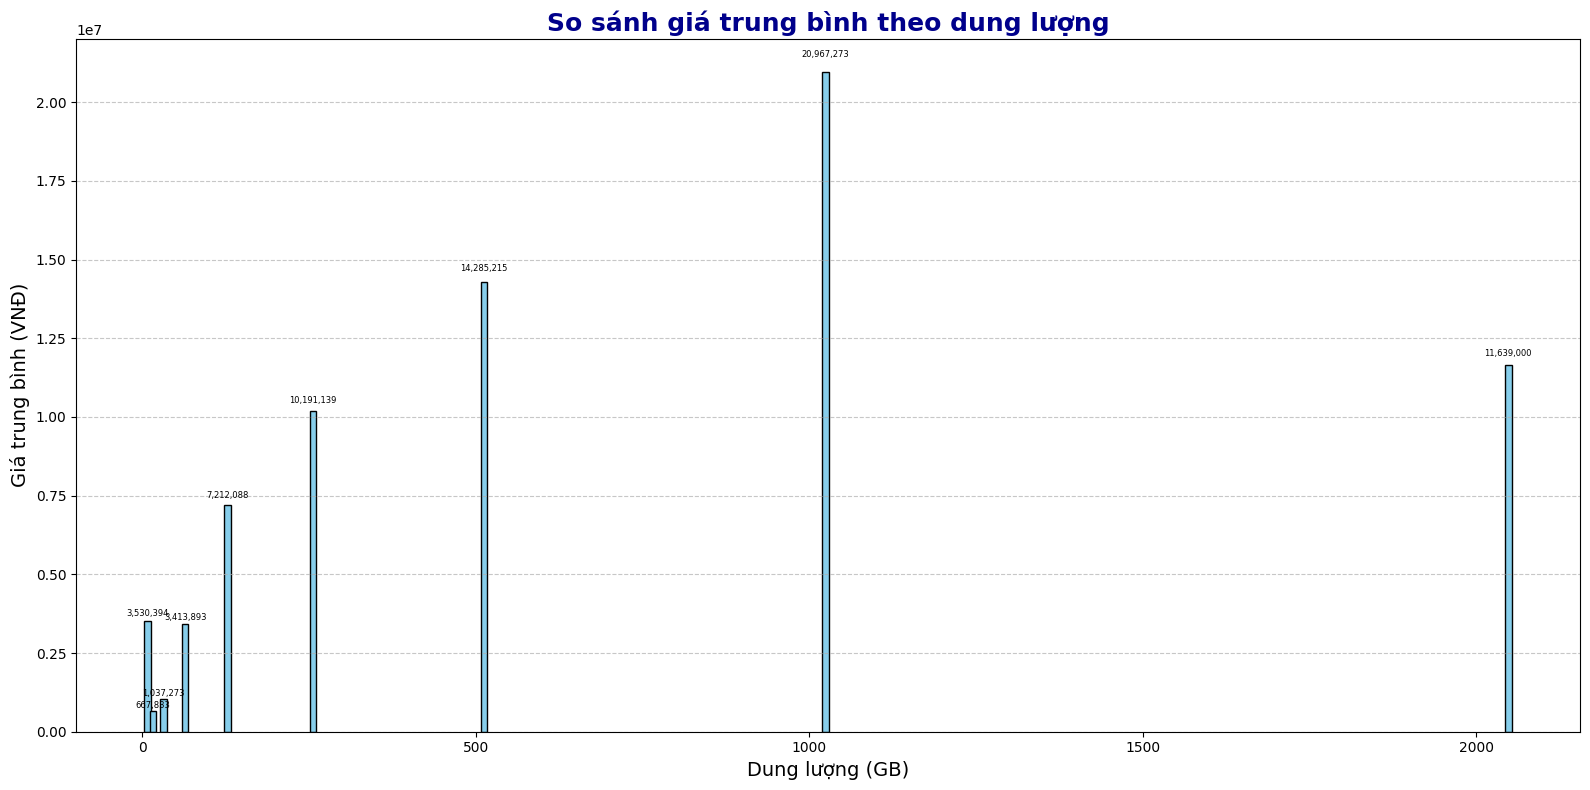

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Tăng kích thước đồ thị
plt.figure(figsize=(16, 8))

# Tính giá trung bình theo dung lượng
avg_price_by_capacity = df.groupby('Capacity')['Price'].mean().reset_index()

# Vẽ biểu đồ dạng cột với chiều rộng cột nhỏ hơn và ít cột
bars = plt.bar(avg_price_by_capacity['Capacity'], avg_price_by_capacity['Price'], width=10, color='skyblue', edgecolor='black')

# Tùy chỉnh trục và tiêu đề
plt.title("So sánh giá trung bình theo dung lượng", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Dung lượng (GB)", fontsize=14)
plt.ylabel("Giá trung bình (VNĐ)", fontsize=14)

# Thêm lưới cho trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval +0.02*yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=6, color='black')

# Tăng độ rộng khoảng cách giữa các cột và các nhãn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**

**Mối tương quan mạnh giữa dung lượng và giá:** Có mối tương quan dương rõ rệt giữa dung lượng lưu trữ và giá trung bình của điện thoại. Khi dung lượng tăng, giá trung bình cũng tăng đáng kể.

**Phân khúc giá rõ rệt:** Dữ liệu cho thấy sự phân nhóm hoặc phân khúc giá rõ ràng, có thể tương ứng với các phân khúc điện thoại khác nhau (cấp thấp, tầm trung, cao cấp). Sự tăng đột biến lớn nhất về giá trung bình xảy ra giữa các dung lượng thấp hơn và các dung lượng cao hơn.

**Giá trị ngoại lệ hoặc vấn đề dữ liệu?:** Giá trung bình rất cao ở khoảng 1000GB có thể là giá trị ngoại lệ hoặc do vấn đề về dữ liệu. Giá này cao hơn đáng kể so với các mức giá khác và cần được điều tra thêm. Có thể chỉ có một số ít điện thoại rất đắt tiền với dung lượng lưu trữ này được đưa vào tập dữ liệu, làm lệch giá trung bình.

**Số điểm dữ liệu hạn chế:** Biểu đồ chỉ hiển thị một vài điểm dữ liệu về dung lượng lưu trữ, cho thấy tập dữ liệu có thể không hoàn toàn đại diện cho toàn bộ thị trường. Nhiều điểm dữ liệu hơn trên phạm vi dung lượng lưu trữ rộng hơn sẽ cung cấp bức tranh toàn diện hơn.




### Phân bố giá theo thương hiệu điện thoại

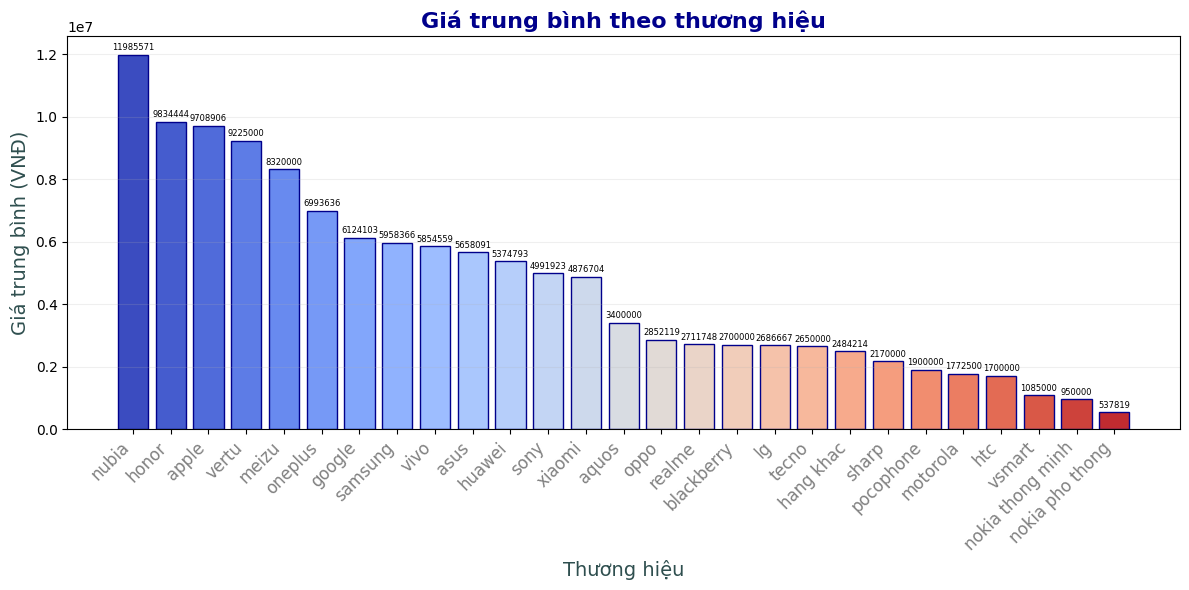

In [8]:
# Tính giá trung bình theo thương hiệu
avg_price_by_brand = df.groupby('Brand')['Price'].mean().reset_index()

# Sắp xếp thương hiệu theo giá trung bình giảm dần
avg_price_by_brand = avg_price_by_brand.sort_values(by='Price', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_brand['Brand'], avg_price_by_brand['Price'], color='dodgerblue', edgecolor='darkblue')

# Tùy chỉnh trục và tiêu đề
plt.title("Giá trung bình theo thương hiệu", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Thương hiệu", fontsize=14, color='darkslategray')
plt.ylabel("Giá trung bình (VNĐ)", fontsize=14, color='darkslategray')

# Căn chỉnh trục x (quay các nhãn trục x)
plt.xticks(rotation=45, ha='right', fontsize=12, color='gray')

# Thêm giá trị vào từng cột (hiển thị giá trị giá trung bình trên mỗi cột)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 80000, f'{height:.0f}', ha='center', va='bottom', fontsize=6, color='black')

# Thêm đường lưới nhẹ để dễ nhìn
plt.grid(axis='y', linestyle='-', alpha=0.2)

# Tùy chỉnh cột với màu sắc gradient nhẹ nhàng từ xanh lam đến tím nhạt
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.coolwarm(i / len(bars)))  # Sử dụng palette nhẹ nhàng

# Cải thiện hiển thị của các nhãn trục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


####**Nhận xét:**
**Nubia có giá trung bình cao nhất:** Thương hiệu Nubia có giá trung bình cao nhất, vượt trội so với các thương hiệu khác. Điều này cho thấy Nubia có thể tập trung vào phân khúc cao cấp, với các sản phẩm có giá thành cao.

**Apple và Honor nằm trong top đầu:** Apple và Honor cũng có giá trung bình rất cao, nằm trong nhóm dẫn đầu. Điều này khẳng định vị thế của hai thương hiệu này trên thị trường điện thoại, với các sản phẩm được định vị ở phân khúc cao cấp và tầm trung cao.

**Sự phân hóa giá giữa các thương hiệu:** Có sự phân hóa giá khá rõ rệt giữa các thương hiệu. Một số thương hiệu như Samsung, Google, Meizu có giá trung bình ở mức khá cao, trong khi các thương hiệu khác như Nokia thông thường, HTC, Vsmart có giá trung bình thấp hơn nhiều. Điều này phản ánh sự khác biệt về chiến lược định giá, phân khúc thị trường và chất lượng sản phẩm của từng thương hiệu.

**Thương hiệu "Hàng khác" có giá trung bình thấp:** Việc nhóm các sản phẩm vào nhóm "Hàng khác" cho thấy giá trung bình thấp hơn, có thể là do sự đa dạng về chất lượng và nguồn gốc của các sản phẩm này.

**Phân khúc giá:** Biểu đồ cho thấy sự tồn tại của nhiều phân khúc giá khác nhau trên thị trường điện thoại, từ phân khúc cao cấp (Nubia, Apple, Honor) đến phân khúc giá rẻ (Nokia thông thường, Vsmart).

### Tỷ lệ phần trăm các màu sắc phổ biến nhất

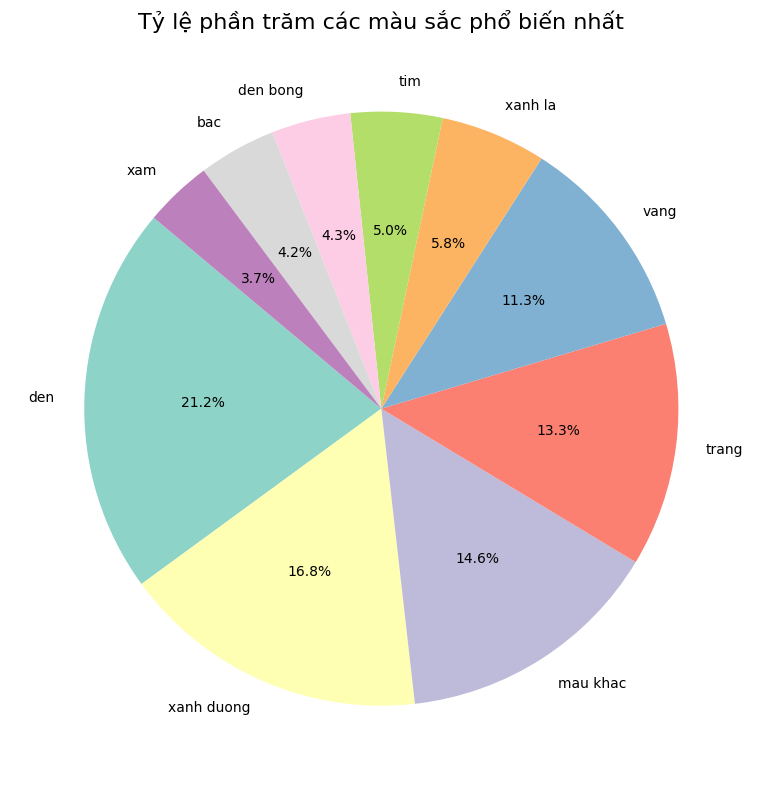

In [9]:
top_colors = df['Color'].value_counts(normalize=True)[:10] * 100
plt.figure(figsize=(8, 8))
plt.pie(top_colors, labels=top_colors.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Tỷ lệ phần trăm các màu sắc phổ biến nhất", fontsize=16)
plt.tight_layout()
plt.show()

#### **Nhận xét**

**Màu đen (đen bóng) chiếm tỷ lệ cao nhất:** Màu đen (kể cả đen bóng) là màu sắc phổ biến nhất, chiếm 21.2% tổng số điện thoại. Điều này cho thấy người tiêu dùng có xu hướng ưa chuộng màu sắc này.

**Màu trắng và vàng xếp sau:** Màu trắng và vàng là hai màu sắc phổ biến thứ hai và thứ ba, chiếm lần lượt 13.3% và 11.3%. Điều này cho thấy sự ưa chuộng màu sắc trung tính và tươi sáng.

**Màu xanh dương cũng được ưa chuộng:** Màu xanh dương chiếm tỷ lệ đáng kể (16.8%), cho thấy đây cũng là một màu sắc được nhiều người lựa chọn.

**Các màu sắc khác chiếm tỷ lệ nhỏ:** Các màu sắc còn lại như tím, xám, bạc, xanh lá, và màu khác chiếm tỷ lệ phần trăm nhỏ hơn, cho thấy sự đa dạng nhưng không quá phổ biến của các màu sắc này.

### Số lượng sản phẩm theo địa điểm

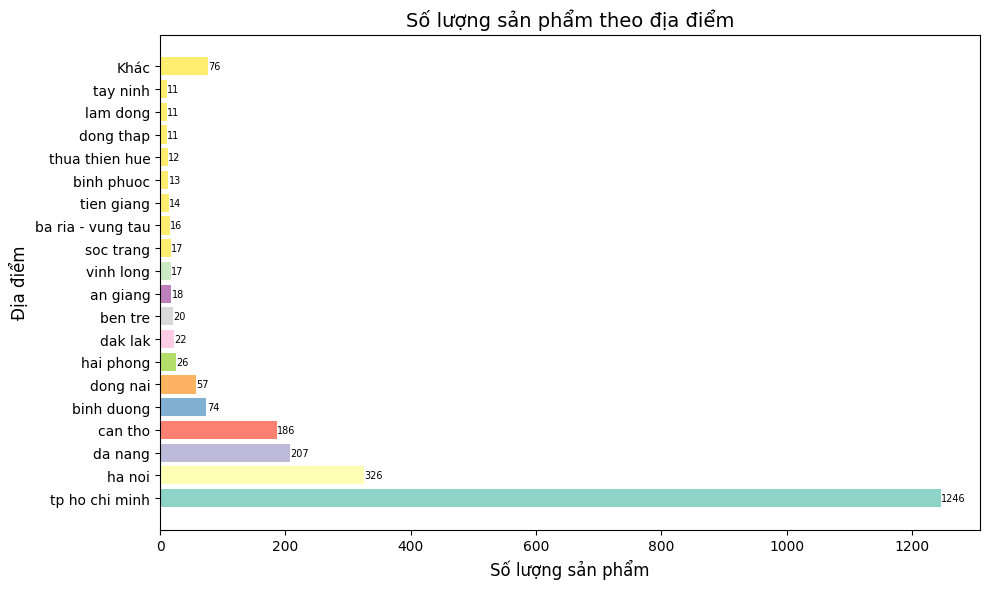

In [10]:
# Lọc các địa điểm có số lượng sản phẩm ít phổ biến
threshold = 10
location_counts = df['Location'].value_counts()
filtered_locations = location_counts[location_counts >= threshold]
other_count = location_counts[location_counts < threshold].sum()

# Gộp các địa điểm ít phổ biến vào "Khác"
filtered_locations['Khác'] = other_count
location_counts = filtered_locations.reset_index()
location_counts.columns = ['Location', 'Count']

# Vẽ biểu đồ ngang với màu sắc đẹp hơn
plt.figure(figsize=(10, 6))
bars = plt.barh(location_counts['Location'], location_counts['Count'], color=plt.cm.Set3(range(len(location_counts))))

# Thêm giá trị lùi ra ngoài
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=7, color='black')

# Tùy chỉnh trục và tiêu đề
plt.title("Số lượng sản phẩm theo địa điểm", fontsize=14)
plt.xlabel("Số lượng sản phẩm", fontsize=12)
plt.ylabel("Địa điểm", fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### **Nhận xét:**

**TP. Hồ Chí Minh chiếm ưu thế áp đảo:** TP. Hồ Chí Minh là địa điểm có số lượng sản phẩm bán ra cao nhất, vượt trội so với các địa điểm khác (1246 sản phẩm). Điều này cho thấy thị trường TP. Hồ Chí Minh rất lớn và tiềm năng.

**Hà Nội đứng thứ hai:** Hà Nội đứng thứ hai về số lượng sản phẩm bán ra (326 sản phẩm), cho thấy đây cũng là một thị trường quan trọng.

**Sự chênh lệch lớn giữa các địa điểm:** Có sự chênh lệch rất lớn về số lượng sản phẩm bán ra giữa TP. Hồ Chí Minh và Hà Nội so với các địa điểm còn lại. Hầu hết các địa điểm khác chỉ bán được số lượng sản phẩm rất nhỏ, dưới 200 sản phẩm.

**Tập trung thị trường:** Thị trường dường như tập trung chủ yếu ở hai thành phố lớn là TP. Hồ Chí Minh và Hà Nội. Các địa điểm khác có thể là thị trường nhỏ hơn hoặc chưa được khai thác triệt để.

### Giá trị trung bình theo thời gian bảo hành

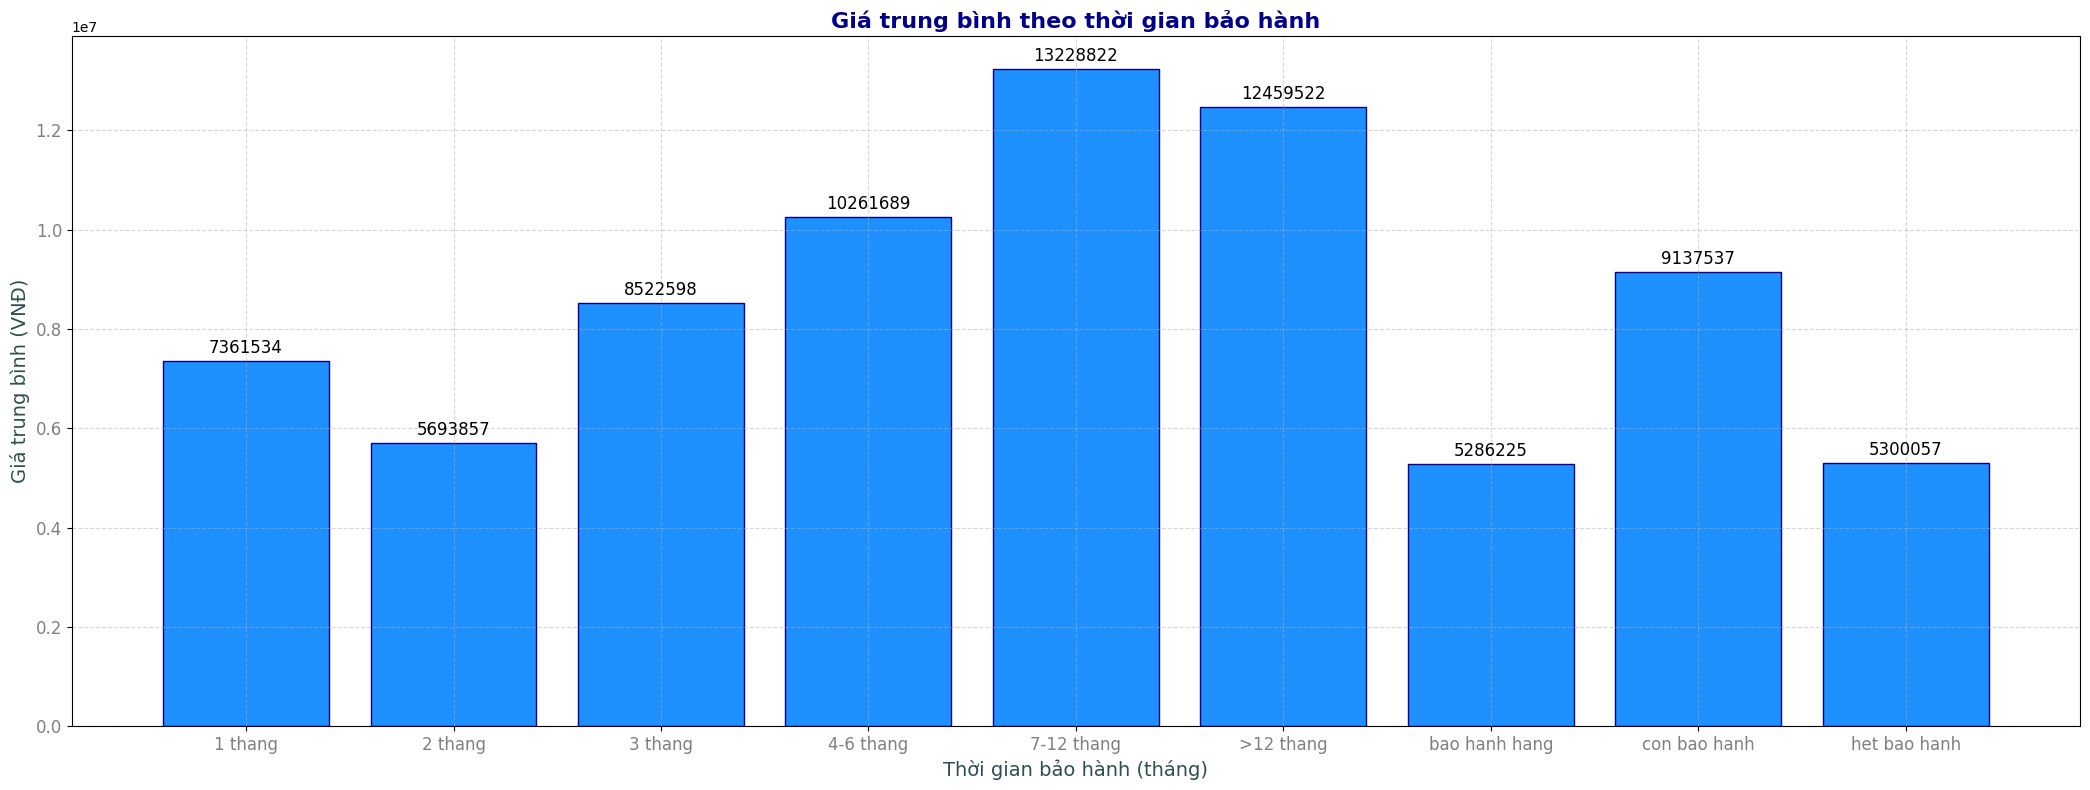

In [11]:
import matplotlib.pyplot as plt

# Tính giá trung bình theo thời gian bảo hành
avg_price_by_guarantee = df.groupby('Guarantee')['Price'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(21, 8))
bars = plt.bar(avg_price_by_guarantee['Guarantee'], avg_price_by_guarantee['Price'], color='dodgerblue', edgecolor='darkblue')

# Tùy chỉnh trục và tiêu đề
plt.title("Giá trung bình theo thời gian bảo hành", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Thời gian bảo hành (tháng)", fontsize=14, color='darkslategray')
plt.ylabel("Giá trung bình (VNĐ)", fontsize=14, color='darkslategray')

# Thêm giá trị vào từng cột (hiển thị giá trị giá trung bình trên mỗi cột)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 80000, f'{height:.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Cải thiện trục x và y, chọn font và màu sắc
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Thêm đường lưới mờ
plt.grid(True, linestyle='--', alpha=0.5)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### **Nhận Xét:**
**Giá trung bình tăng theo thời gian bảo hành (xu hướng chung):** Nhìn chung, giá trung bình của điện thoại có xu hướng tăng khi thời gian bảo hành tăng lên. Điều này khá hợp lý vì người dùng thường sẵn sàng trả giá cao hơn cho sản phẩm có thời gian bảo hành dài hơn, thể hiện sự tin tưởng vào chất lượng và dịch vụ bảo hành của nhà cung cấp.

**Sự gia tăng giá không tuyến tính:** Tuy nhiên, sự gia tăng giá không phải là tuyến tính. Sự tăng giá mạnh nhất xảy ra khi thời gian bảo hành chuyển từ 7-12 tháng lên >12 tháng. Điều này có thể cho thấy người dùng đánh giá cao việc có thời gian bảo hành dài hơn 12 tháng, phản ánh sự mong muốn về độ ổn định và tin cậy cao của sản phẩm.

**Thời gian bảo hành ngắn hơn có giá thấp hơn:** Điện thoại có thời gian bảo hành 1 tháng, 2 tháng và 3 tháng có giá trung bình thấp nhất. Điều này có thể phản ánh phân khúc sản phẩm cấp thấp hoặc điện thoại đã qua sử dụng.



### GIá trị trung bình theo xuất xứ của máy

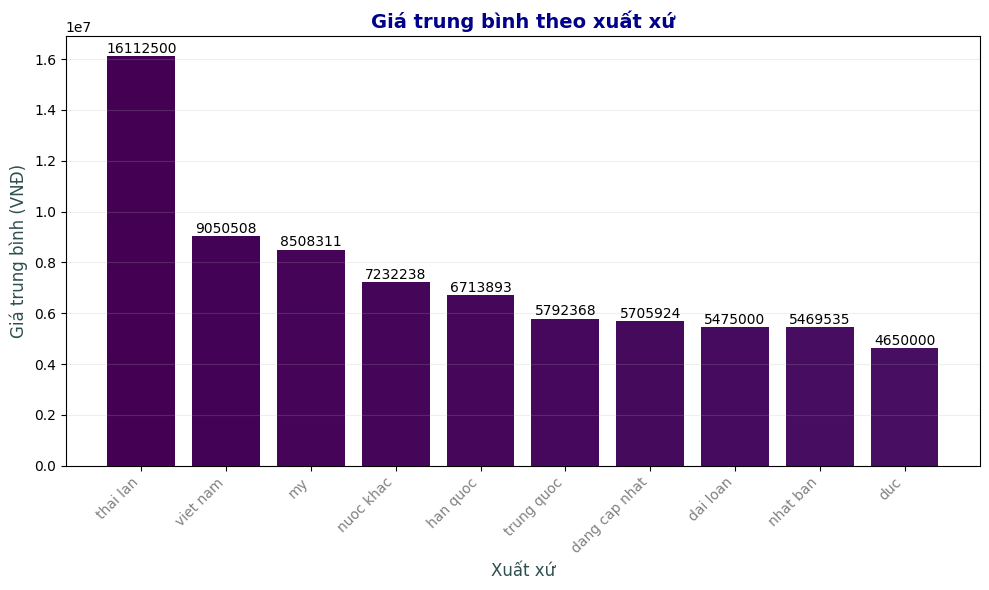

In [12]:
# Tính giá trung bình theo xuất xứ
avg_price_by_origin = df.groupby('Origin')['Price'].mean().reset_index()

# Sắp xếp xuất xứ theo giá trung bình giảm dần
avg_price_by_origin = avg_price_by_origin.sort_values(by='Price', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_origin['Origin'], avg_price_by_origin['Price'], color=plt.cm.viridis(range(len(avg_price_by_origin))))

# Tùy chỉnh trục và tiêu đề
plt.title("Giá trung bình theo xuất xứ", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Xuất xứ", fontsize=12, color='darkslategray')
plt.ylabel("Giá trung bình (VNĐ)", fontsize=12, color='darkslategray')

# Quay nhãn trục x và thay đổi phông chữ
plt.xticks(rotation=45, ha='right', fontsize=10, color='gray')

# Thêm giá trị vào mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Cải thiện giao diện với đường lưới nhẹ
plt.grid(axis='y', linestyle='-', alpha=0.2)

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Nhận xét:

**Điện thoại Thái Lan có giá trung bình cao nhất:** Điện thoại sản xuất tại Thái Lan có giá trung bình cao nhất (khoảng 16.1 triệu VNĐ), cho thấy đây có thể là những sản phẩm cao cấp hoặc có giá trị thương hiệu cao.

**Việt Nam và Mỹ xếp sau:** Điện thoại sản xuất tại Việt Nam và Mỹ có giá trung bình xếp thứ hai và thứ ba, cho thấy hai quốc gia này cũng là những nguồn cung cấp điện thoại có chất lượng tốt và giá thành khá cao.

**Sự khác biệt giá giữa các xuất xứ:** Có sự khác biệt về giá trung bình giữa các quốc gia sản xuất. Các quốc gia như Thái Lan, Việt Nam, Mỹ có giá trung bình cao hơn so với các quốc gia khác như Đức, Nhật Bản, Đài Loan, Hàn Quốc, Trung Quốc và "nước khác". Sự chênh lệch này có thể do nhiều yếu tố, bao gồm chi phí sản xuất, thuế nhập khẩu, giá trị thương hiệu và chất lượng sản phẩm.

**"Nước khác" là phân khúc trung bình:** Nhóm "nước khác" có giá trung bình nằm ở mức khá trung bình. Điều này có thể cho thấy sự đa dạng về chất lượng và giá cả của các sản phẩm điện thoại từ nhiều nguồn khác nhau.

### Giá trung bình theo trạng thái và thương hiệu

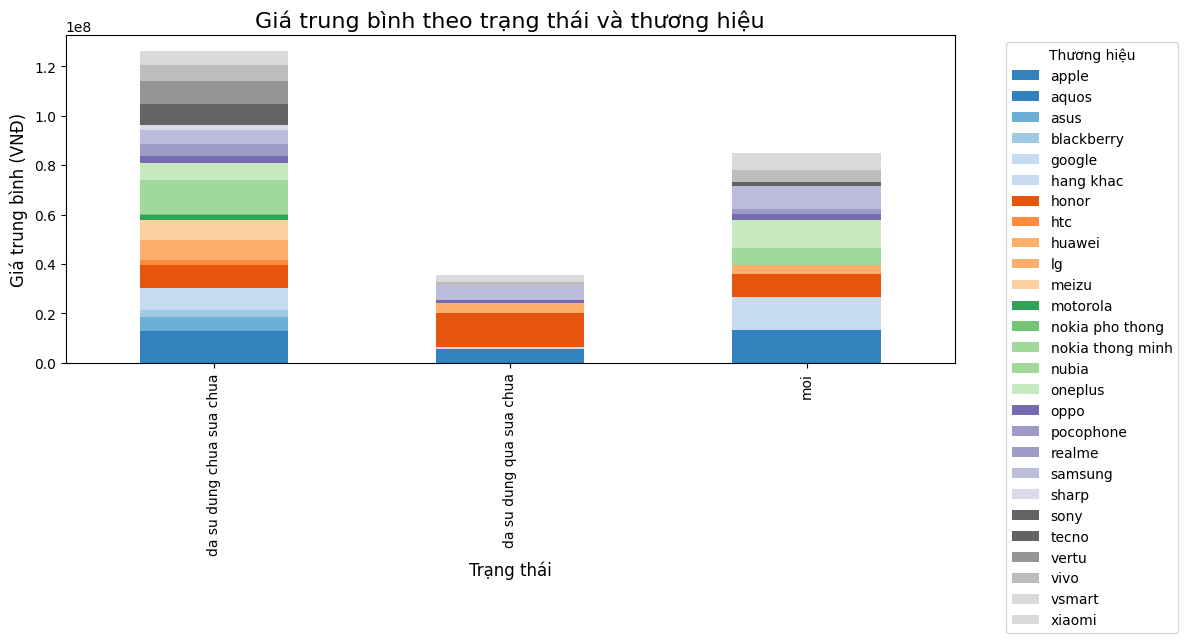

In [13]:
# Tính giá trung bình theo trạng thái và thương hiệu
status_brand_price = df.groupby(['Status', 'Brand'])['Price'].mean().unstack()

# Vẽ biểu đồ cột với giá trung bình theo trạng thái và thương hiệu
status_brand_price.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

# Thêm tiêu đề cho biểu đồ
plt.title("Giá trung bình theo trạng thái và thương hiệu", fontsize=16)

# Thêm nhãn cho trục x và trục y
plt.xlabel("Trạng thái", fontsize=12)
plt.ylabel("Giá trung bình (VNĐ)", fontsize=12)

# Hiển thị chú thích với tiêu đề 'Thương hiệu', đặt ở vị trí ngoài đồ thị
plt.legend(title="Thương hiệu", bbox_to_anchor=(1.05, 1), loc='upper left')

# Căn chỉnh bố cục để tránh bị cắt xén
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Điện thoại mới có giá trung bình cao hơn điện thoại cũ:** Nhìn chung, giá trung bình của điện thoại mới ("mới") cao hơn đáng kể so với điện thoại đã qua sử dụng ("đã sử dụng chưa sửa chữa"). Sự khác biệt này là hiển nhiên và phù hợp với quy luật thị trường.

**Apple chiếm tỷ lệ lớn trong cả hai nhóm:** Thương hiệu Apple chiếm một phần đáng kể trong tổng giá trị trung bình ở cả hai nhóm điện thoại mới và đã qua sử dụng. Điều này cho thấy Apple là một thương hiệu có giá trị cao và được ưa chuộng ở cả hai phân khúc.

**Samsung cũng đóng góp đáng kể:** Tương tự, Samsung cũng có tỷ lệ giá trị trung bình lớn trong cả hai nhóm, cho thấy đây cũng là một thương hiệu lớn và phổ biến trên thị trường.

**Phân bổ thương hiệu khác nhau:** Sự phân bổ các thương hiệu khác nhau trong hai nhóm "mới" và "đã sử dụng chưa sửa chữa" cũng cho thấy sự khác biệt về chiến lược kinh doanh và phân khúc thị trường của từng thương hiệu. Một số thương hiệu có thể tập trung nhiều hơn vào phân khúc điện thoại mới, trong khi các thương hiệu khác tập trung vào phân khúc điện thoại cũ.

###Boxplot giá theo xuất xứ


<Figure size 1000x600 with 0 Axes>

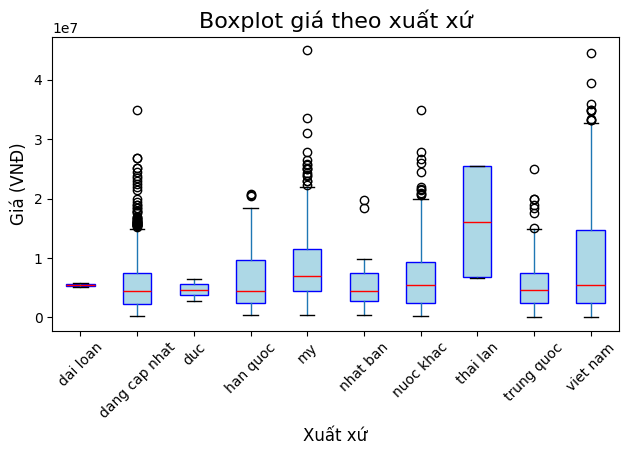

In [14]:
# Tạo biểu đồ boxplot giá theo xuất xứ
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Origin', grid=False, patch_artist=True,
             boxprops=dict(facecolor="lightblue", color="blue"), medianprops=dict(color="red"))

# Thêm tiêu đề cho biểu đồ
plt.title("Boxplot giá theo xuất xứ", fontsize=16)

# Xóa tiêu đề mặc định (được thêm bởi plt.boxplot khi sử dụng 'by')
plt.suptitle("")

# Thêm nhãn cho trục x và trục y
plt.xlabel("Xuất xứ", fontsize=12)
plt.ylabel("Giá (VNĐ)", fontsize=12)

# Căn chỉnh nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Căn chỉnh bố cục để tránh bị cắt xén
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Thái Lan có giá trung vị cao nhất và độ phân tán lớn:** Xuất xứ Thái Lan có giá trung vị (đường gạch đỏ nằm giữa hộp) cao nhất trong các quốc gia được khảo sát. Hơn nữa, khoảng cách giữa giá trị lớn nhất và nhỏ nhất rất lớn, cho thấy sự phân tán giá cả của điện thoại Thái Lan khá rộng. Có một số điện thoại Thái Lan có giá bán rất cao.

**Việt Nam có giá trung vị khá cao nhưng phân tán ít hơn:** Điện thoại Việt Nam có giá trung vị cao thứ hai, nhưng khoảng cách giữa giá trị lớn nhất và nhỏ nhất nhỏ hơn so với Thái Lan, cho thấy sự phân tán giá ở Việt Nam ít hơn.

**Mỹ có giá trung vị ở mức trung bình:** Giá trung vị của điện thoại Mỹ nằm ở mức trung bình, không quá cao cũng không quá thấp. Tuy nhiên, độ phân tán giá cũng khá lớn.

**Các quốc gia khác có giá trung vị thấp và phân tán thấp hơn:** Điện thoại từ các quốc gia còn lại như Nhật Bản, Đức, Hàn Quốc, "nước khác" có giá trung vị thấp hơn nhiều so với Thái Lan và Việt Nam. Độ phân tán giá cũng tương đối thấp, cho thấy sự đồng đều về giá cả của các sản phẩm từ các quốc gia này.

**Giá trị ngoại lệ:** Có nhiều giá trị ngoại lệ (điểm nằm ngoài whisker) ở một số quốc gia, đặc biệt là Thái Lan và Mỹ. Điều này cho thấy sự tồn tại của một số mẫu điện thoại có giá bán rất cao hoặc rất thấp so với các mẫu khác cùng quốc gia.

### Phân bố giá theo trạng thái sản phẩm (boxplot)

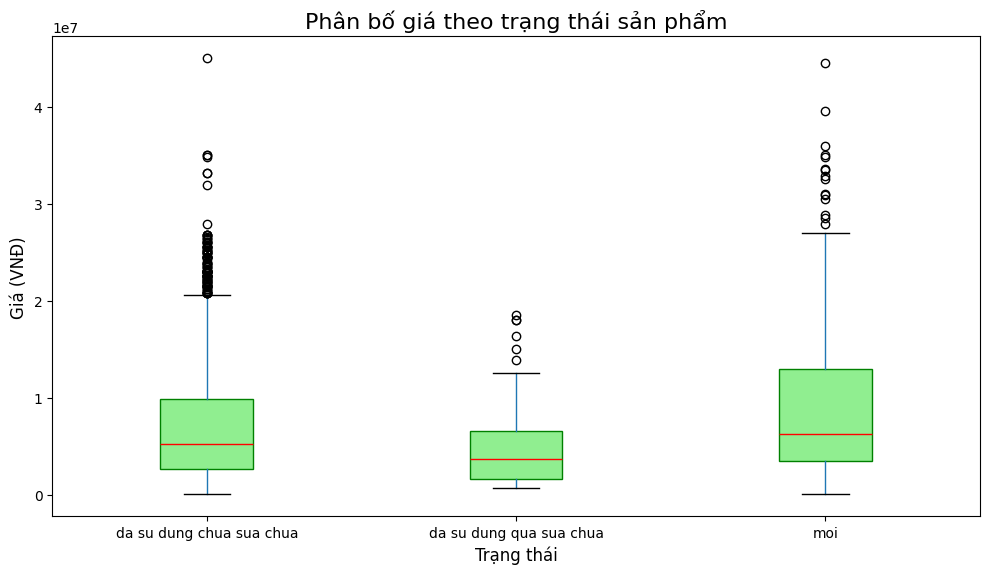

In [15]:
# Tạo một đồ thị với kích thước 10x6
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ boxplot theo trạng thái sản phẩm
df.boxplot(column='Price', by='Status', grid=False, patch_artist=True,
             boxprops=dict(facecolor="lightgreen", color="green"), medianprops=dict(color="red"), ax=ax)

# Thiết lập tiêu đề cho biểu đồ
ax.set_title("Phân bố giá theo trạng thái sản phẩm", fontsize=16)

# Xóa tiêu đề mặc định (được thêm bởi plt.boxplot khi sử dụng 'by')
plt.suptitle("")

# Thiết lập nhãn cho trục x và trục y
ax.set_xlabel("Trạng thái", fontsize=12)
ax.set_ylabel("Giá (VNĐ)", fontsize=12)

# Căn chỉnh bố cục để không bị cắt xén
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Giá điện thoại mới cao hơn đáng kể:** Như dự đoán, giá trung vị (đường kẻ đỏ bên trong hộp) của điện thoại mới cao hơn rất nhiều so với hai trạng thái còn lại. Khoảng cách giữa giá trung vị của điện thoại mới và hai trạng thái đã qua sử dụng rất lớn.

**Điện thoại đã sử dụng chưa sửa chữa có giá thấp nhất:** Điện thoại đã sử dụng nhưng chưa qua sửa chữa có giá trung vị thấp nhất, cho thấy giá trị của chúng bị giảm đáng kể so với điện thoại mới.

**Độ phân tán giá:** Điện thoại mới có độ phân tán giá (khoảng cách giữa các đường viền trên và dưới của hộp) tương đối lớn, cho thấy có sự chênh lệch giá khá nhiều giữa các mẫu điện thoại mới. Điện thoại đã qua sử dụng (cả hai loại) có độ phân tán giá nhỏ hơn, có thể do giá trị của chúng đã được điều chỉnh theo tình trạng.

**Giá trị ngoại lệ:** Có một số giá trị ngoại lệ (điểm tròn đen nằm ngoài các đường râu) trong cả ba trạng thái, đặc biệt là ở nhóm điện thoại mới và đã sử dụng chưa sửa chữa. Những giá trị này có thể đại diện cho các mẫu điện thoại cao cấp, hoặc trường hợp hiếm gặp có giá bán rất cao/thấp.

### Tỷ lệ phần trăm trạng thái sản phẩm theo từng xuất xứ

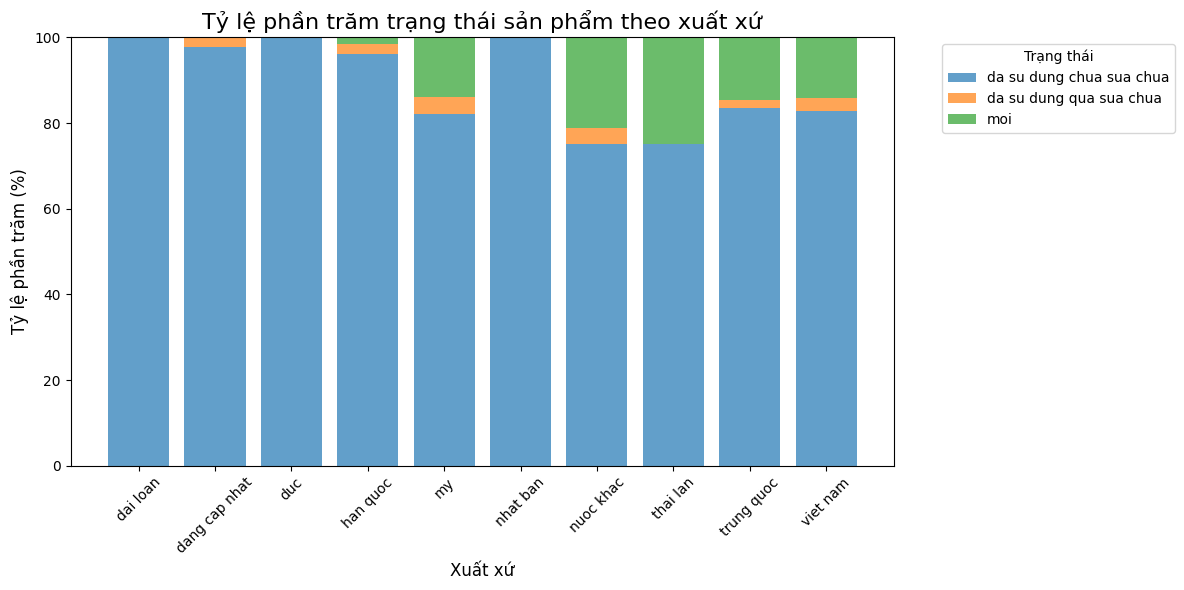

In [16]:
# Tính tỷ lệ phần trăm trạng thái sản phẩm theo xuất xứ
status_origin_pct = df.groupby(['Origin', 'Status']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Tạo một figure và axis với kích thước 12x6
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ các cột stacked bar cho từng trạng thái
for i, col in enumerate(status_origin_pct.columns):
    ax.bar(status_origin_pct.index, status_origin_pct[col], bottom=status_origin_pct.iloc[:, :i].sum(axis=1),
           label=col, alpha=0.7)

# Thiết lập tiêu đề cho biểu đồ
ax.set_title("Tỷ lệ phần trăm trạng thái sản phẩm theo xuất xứ", fontsize=16)

# Thiết lập nhãn cho trục x và trục y
ax.set_xlabel("Xuất xứ", fontsize=12)
ax.set_ylabel("Tỷ lệ phần trăm (%)", fontsize=12)

# Thêm chú thích cho trạng thái sản phẩm
ax.legend(title="Trạng thái", bbox_to_anchor=(1.05, 1), loc='upper left')

# Cải thiện nhãn trục x và xoay 45 độ
plt.xticks(rotation=45)

# Điều chỉnh bố cục để tránh bị cắt xén
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Đa số điện thoại đến từ các quốc gia là đã qua sử dụng:** Ở hầu hết các quốc gia được khảo sát (Đài Loan, đang cập nhật, Đức, Hàn Quốc, Mỹ, Nhật Bản, nước khác, Thái Lan, Trung Quốc, Việt Nam), tỷ lệ điện thoại "đã sử dụng chưa sửa chữa" chiếm phần lớn. Điều này cho thấy thị trường điện thoại đã qua sử dụng khá phổ biến.

**Tỷ lệ điện thoại mới cao nhất ở Thái Lan:** Điện thoại "mới" có tỷ lệ cao nhất ở Thái Lan, cho thấy có thể Thái Lan có nhiều điện thoại mới được nhập khẩu hoặc sản xuất tại đây.

**Tỷ lệ điện thoại qua sửa chữa thấp:** Tỷ lệ điện thoại "đã sử dụng qua sửa chữa" nhìn chung thấp hơn so với "đã sử dụng chưa sửa chữa" ở hầu hết các quốc gia. Điều này có thể do người dùng ưu tiên mua điện thoại chưa qua sửa chữa hoặc số lượng điện thoại cần sửa chữa không nhiều.

**Sự khác biệt giữa các quốc gia:** Có sự khác biệt nhỏ giữa các quốc gia về tỷ lệ phần trăm trạng thái sản phẩm. Tuy nhiên, sự khác biệt này không quá lớn.

###  Biểu đồ nhiệt giá trung bình giữa thương hiệu và dung lượng

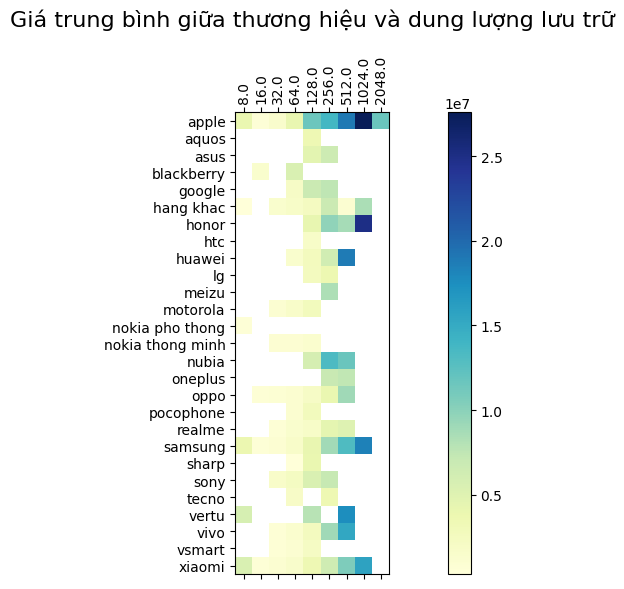

In [17]:
# Tạo bảng pivot để tính giá trung bình theo thương hiệu và dung lượng
brand_capacity_pivot = df.pivot_table(index='Brand', columns='Capacity', values='Price', aggfunc='mean')

# Tạo một figure và axis với kích thước 12x6
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ heatmap với cmap 'YlGnBu' và phương pháp interpolation "nearest"
cax = ax.matshow(brand_capacity_pivot, cmap="YlGnBu", interpolation="nearest")

# Thêm colorbar để hiển thị các giá trị màu sắc
plt.colorbar(cax)

# Thiết lập các tick cho trục x và trục y
ax.set_xticks(np.arange(len(brand_capacity_pivot.columns)))
ax.set_yticks(np.arange(len(brand_capacity_pivot.index)))

# Đặt nhãn cho trục x và trục y
ax.set_xticklabels(brand_capacity_pivot.columns, rotation=90)
ax.set_yticklabels(brand_capacity_pivot.index)

# Thiết lập tiêu đề cho biểu đồ
ax.set_title("Giá trung bình giữa thương hiệu và dung lượng lưu trữ", pad=20, fontsize=16)

# Điều chỉnh bố cục cho phù hợp
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Giá tăng theo dung lượng:** Nhìn chung, giá trung bình của điện thoại có xu hướng tăng lên khi dung lượng lưu trữ tăng. Điều này là hợp lý, vì điện thoại có dung lượng lớn thường có cấu hình cao hơn và nhiều tính năng hơn.

**Apple và Nubia có giá cao nhất:** Các thương hiệu Apple và Nubia thường có giá trung bình cao nhất ở hầu hết các mức dung lượng lưu trữ. Điều này cho thấy hai thương hiệu này thường tập trung vào phân khúc cao cấp.

**Sự khác biệt giữa các thương hiệu:** Có sự khác biệt đáng kể về giá trung bình giữa các thương hiệu điện thoại, ngay cả ở cùng một mức dung lượng lưu trữ. Điều này cho thấy sự khác biệt về chiến lược giá, chất lượng sản phẩm, và giá trị thương hiệu.

**Một số thương hiệu có giá thấp hơn:** Một số thương hiệu như Vsmart, Nokia phổ thông, Xiaomi có giá trung bình thấp hơn so với các thương hiệu khác ở cùng mức dung lượng. Điều này phản ánh định vị sản phẩm của họ thường ở phân khúc tầm trung hoặc giá rẻ.

**Phân bổ không đồng đều:** Phân bổ giá không hoàn toàn đồng đều trên heatmap. Một số ô màu sáng hơn (giá thấp) trong khi một số ô khác có màu đậm hơn (giá cao), cho thấy sự đa dạng về giá cả giữa các thương hiệu và dung lượng.

###Tương quan giữa giá và dung lượng lưu trữ

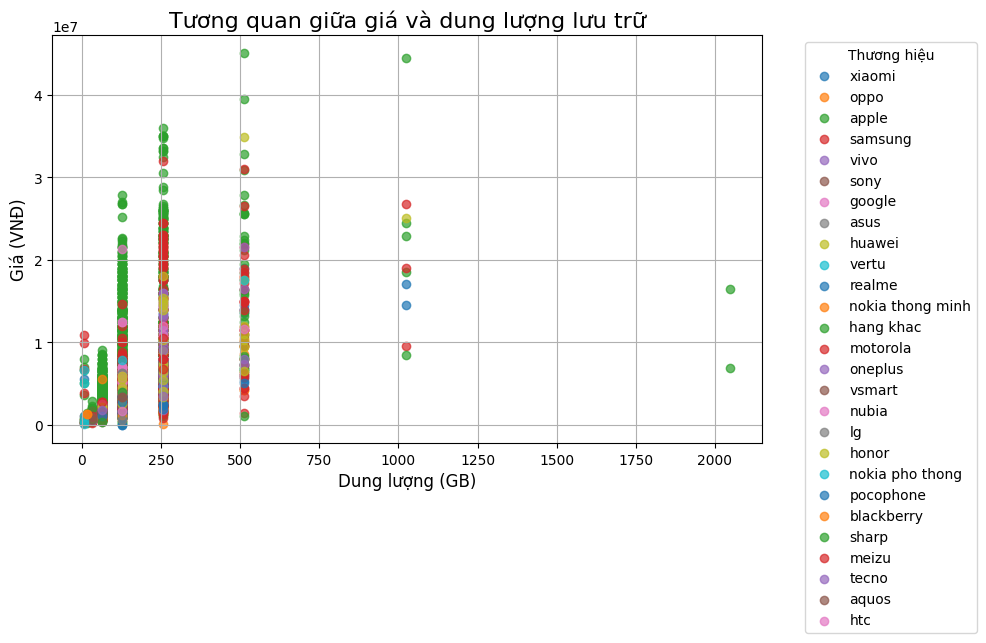

In [18]:
plt.figure(figsize=(10, 6))  # Tạo một biểu đồ có kích thước 10x6

# Lặp qua từng thương hiệu trong dữ liệu
for brand in df['Brand'].unique():
    # Lọc ra dữ liệu của từng thương hiệu
    subset = df[df['Brand'] == brand]

    # Vẽ scatter plot cho từng thương hiệu, sử dụng màu sắc và độ mờ khác nhau cho mỗi thương hiệu
    plt.scatter(subset['Capacity'], subset['Price'], label=brand, alpha=0.7)

# Thêm tiêu đề cho biểu đồ
plt.title("Tương quan giữa giá và dung lượng lưu trữ", fontsize=16)

# Thiết lập nhãn cho các trục
plt.xlabel("Dung lượng (GB)", fontsize=12)
plt.ylabel("Giá (VNĐ)", fontsize=12)

# Hiển thị legend cho từng thương hiệu, đặt ở góc trên bên trái
plt.legend(title="Thương hiệu", bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm lưới vào biểu đồ để dễ dàng đọc giá trị
plt.grid(True)

# Điều chỉnh bố cục để tránh bị cắt xén
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
**Tương quan giữa giá và dung lượng:** Có sự tương quan dương giữa giá và dung lượng lưu trữ. Nói chung, dung lượng càng lớn thì giá cả càng cao. Tuy nhiên, mối tương quan này không hoàn toàn tuyến tính, có sự phân tán dữ liệu khá lớn.

**Phân nhóm giá theo thương hiệu:** Các thương hiệu khác nhau có xu hướng tập trung ở các mức giá khác nhau. Ví dụ, Apple và Nubia thường nằm ở phân khúc giá cao, trong khi một số thương hiệu khác như Xiaomi, Nokia phổ thông, Vsmart nằm ở phân khúc giá thấp hơn.

**Dung lượng lưu trữ không phải là yếu tố quyết định giá:** Mặc dù có tương quan dương, nhưng dung lượng lưu trữ không phải là yếu tố duy nhất quyết định giá. Nhiều điểm dữ liệu cùng dung lượng nhưng có giá khác nhau, cho thấy các yếu tố khác như thương hiệu, cấu hình, tính năng... cũng rất quan trọng.

**Giá trị ngoại lệ:** Có một số điểm dữ liệu nằm ngoài xu hướng chung, có thể là do các yếu tố đặc biệt như phiên bản đặc biệt, hoặc lỗi trong dữ liệu.

### Tương quan giữa thời gian bảo hành và giá

<ipython-input-19-3bada5541068>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', 20)  # Bảng màu 'tab20' có 20 màu
<ipython-input-19-3bada5541068>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  additional_colors = cm.get_cmap('tab10', 10)  # Bảng màu 'tab10' có 10 màu


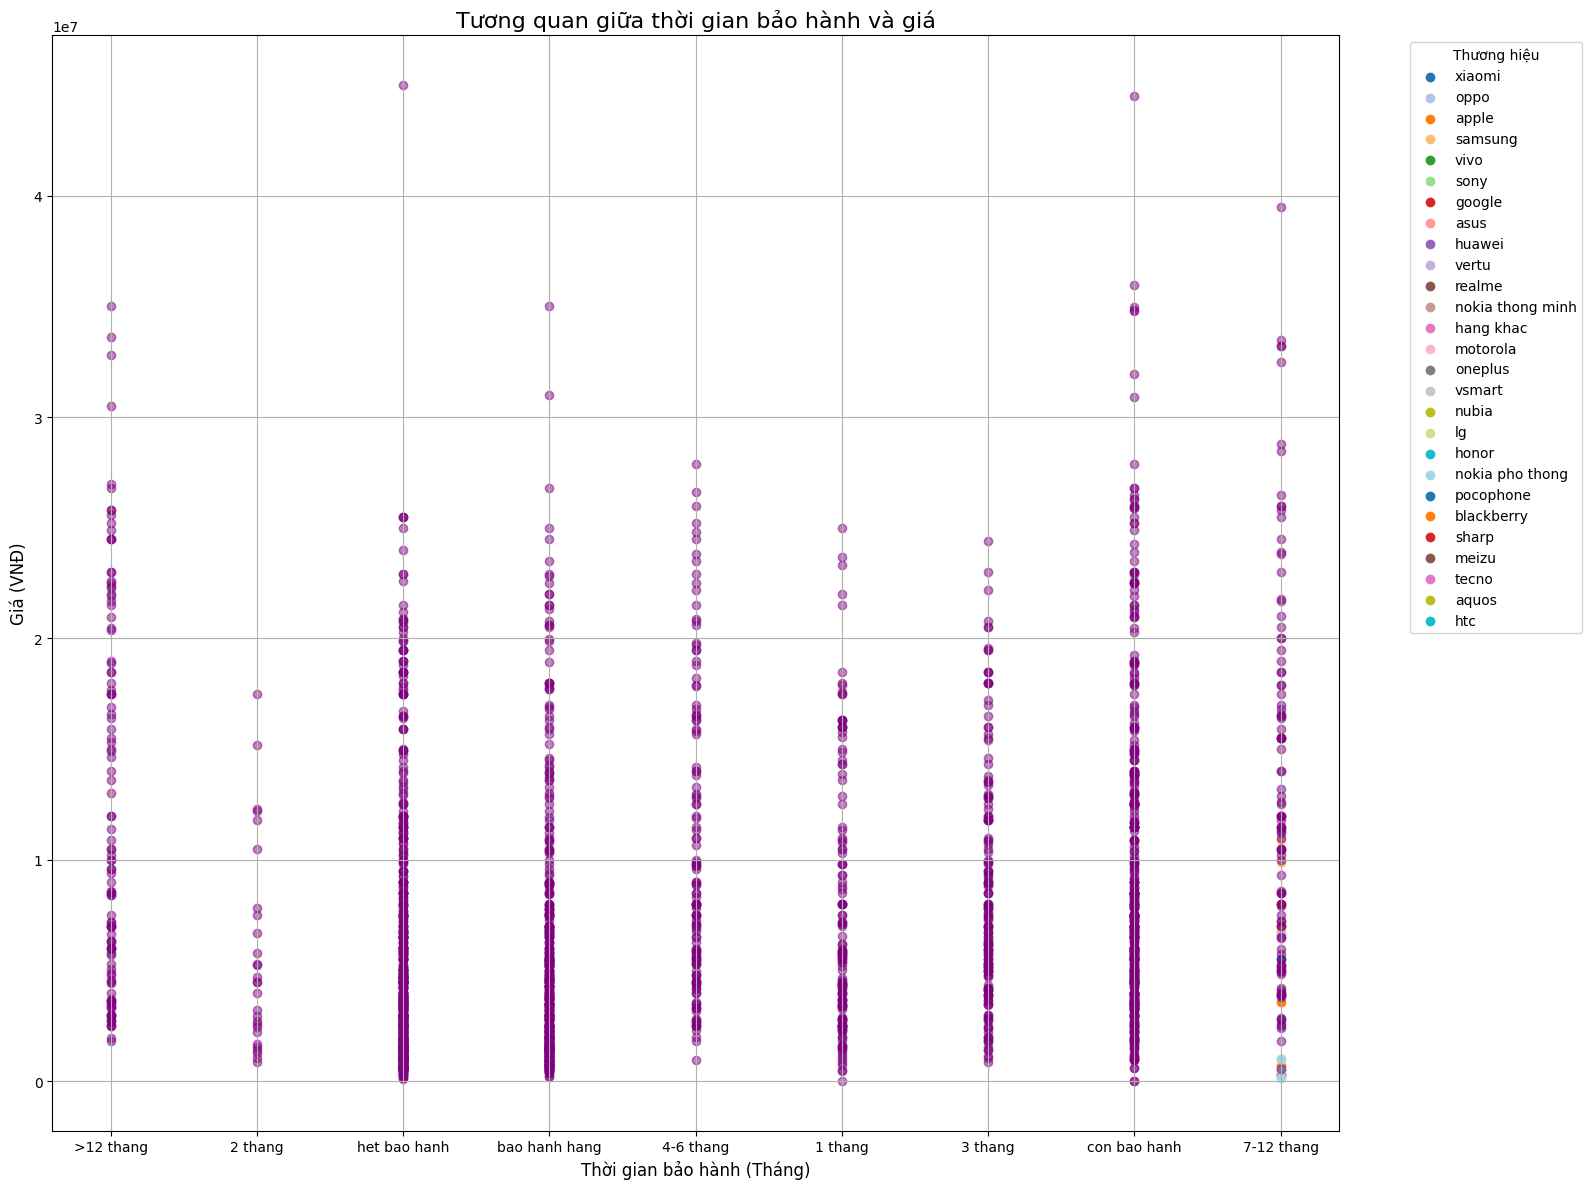

In [19]:
# Tạo bảng màu đủ 27 màu sắc khác nhau bằng cách kết hợp các bảng màu
colors = cm.get_cmap('tab20', 20)  # Bảng màu 'tab20' có 20 màu
additional_colors = cm.get_cmap('tab10', 10)  # Bảng màu 'tab10' có 10 màu
all_colors = np.concatenate([colors(np.linspace(0, 1, 20)), additional_colors(np.linspace(0, 1, 7))])

# Vẽ biểu đồ
plt.figure(figsize=(16, 12))

# Lặp qua từng thương hiệu trong dữ liệu
for idx, brand in enumerate(df['Brand'].unique()):
    # Lọc ra dữ liệu của từng thương hiệu
    subset = df[df['Brand'] == brand]

    # Vẽ scatter plot cho từng thương hiệu, sử dụng màu sắc khác nhau cho mỗi thương hiệu
    plt.scatter(subset['Capacity'], subset['Price'], label=brand, alpha=1, color=all_colors[idx])

# Vẽ scatter plot cho mối quan hệ giữa thời gian bảo hành và giá, sử dụng màu tím và độ mờ thấp
plt.scatter(df['Guarantee'], df['Price'], alpha=0.5, color='purple')

# Thêm tiêu đề cho biểu đồ
plt.title("Tương quan giữa thời gian bảo hành và giá", fontsize=16)

# Thiết lập nhãn cho các trục
plt.xlabel("Thời gian bảo hành (Tháng)", fontsize=12)
plt.ylabel("Giá (VNĐ)", fontsize=12)

# Hiển thị legend cho từng thương hiệu, đặt ở góc trên bên trái
plt.legend(title="Thương hiệu", bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm lưới vào biểu đồ để dễ dàng đọc giá trị
plt.grid(True)

plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**

**1. Giá và Thời gian bảo hành:**

**Không có mối tương quan rõ ràng:** Nhìn chung, biểu đồ cho thấy không có mối tương quan tuyến tính rõ ràng giữa thời gian bảo hành và giá sản phẩm. Các sản phẩm có giá cao vẫn có thể có thời gian bảo hành ngắn và ngược lại.

**Tập trung ở mức giá thấp:** Phần lớn các sản phẩm tập trung ở phân khúc giá dưới 10 triệu VND, bất kể thời gian bảo hành.

**Sản phẩm giá cao, bảo hành dài hơn:** Tuy nhiên, có thể thấy rằng các sản phẩm có giá trên 30 triệu VND thường có thời gian bảo hành dài hơn (trên 12 tháng).

**2. Phân bố theo thời gian bảo hành:**

**"Hết bảo hành" và ">12 tháng" chiếm đa số:** Hai nhóm thời gian bảo hành "hết bảo hành" và ">12 tháng" có số lượng sản phẩm nhiều nhất.

**"Bảo hành hãng" và "4-6 tháng" ít phổ biến hơn:** Hai nhóm này có ít sản phẩm hơn so với các nhóm còn lại.

**3. Phân bố theo thương hiệu:**

**Sự đa dạng về thương hiệu:** Biểu đồ thể hiện sự đa dạng về thương hiệu điện thoại, với nhiều thương hiệu khác nhau ở các phân khúc giá và thời gian bảo hành khác nhau.

**Một số thương hiệu nổi bật:**

Apple: Có xu hướng giá cao và thời gian bảo hành trên 12 tháng.

Samsung: Phân bố rộng rãi ở nhiều mức giá và thời gian bảo hành.

Xiaomi, Oppo, Vivo, Realme: Tập trung ở phân khúc giá thấp đến trung bình, với thời gian bảo hành đa dạng.

Vertu: Thương hiệu cao cấp với giá rất cao và thời gian bảo hành trên 12 tháng.

**4. Nhóm "Hết bảo hành":**

**Giá trị thấp:** Nhóm "hết bảo hành" chủ yếu tập trung ở phân khúc giá thấp, cho thấy đây có thể là các sản phẩm cũ, đã qua sử dụng hoặc không còn được hỗ trợ bảo hành chính hãng.

**Đa dạng thương hiệu:** Nhóm này bao gồm nhiều thương hiệu khác nhau, cho thấy việc hết bảo hành không phụ thuộc vào một thương hiệu cụ thể.



## Phân tích thăm dò dữ liệu

In [20]:
df.shape

(2380, 9)

In [21]:
numeric_df = df.select_dtypes(include=[float, int]) #trích xuất các cột dạng số (int,float)
correlation = numeric_df.corr()  #tính hệ số tương quan

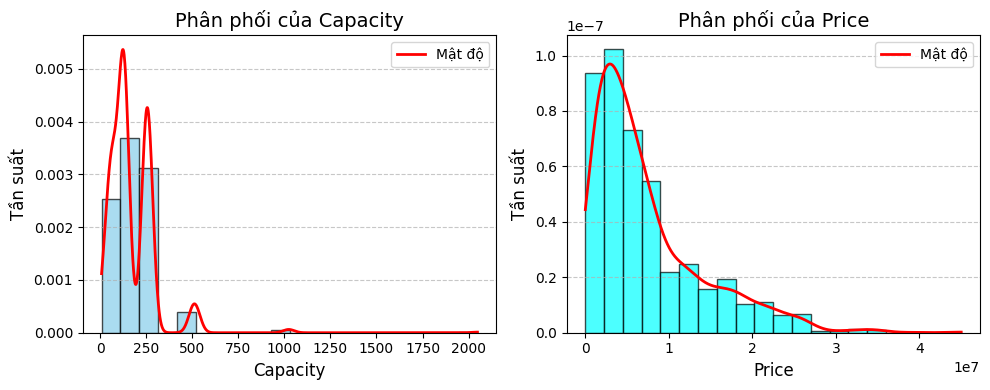

In [22]:
colors = ['skyblue', 'cyan']

# Số cột
num_cols = len(numeric_df.columns)

_, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4), sharey=False)

# Vẽ từng biểu đồ
for i, col in enumerate(numeric_df.columns):
    axes[i].hist(numeric_df[col], bins=20, color=colors[i % len(colors)], alpha=0.7, edgecolor='black', density=True)

    # Tính toán mật độ
    kde = gaussian_kde(numeric_df[col], bw_method='silverman')
    x_vals = np.linspace(numeric_df[col].min(), numeric_df[col].max(), 1000)
    axes[i].plot(x_vals, kde(x_vals), color='red', lw=2, label='Mật độ')

    # Thiết lập nhãn và tiêu đề
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Tần suất', fontsize=12)
    axes[i].set_title(f'Phân phối của {col}', fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=10)

# Căn chỉnh khoảng trống giữa các biểu đồ
plt.tight_layout()
plt.show()


#### **Nhận xét:**

**1. Distribution of Capacity (Phân bố dung lượng):**

**Tập trung ở 2 mức dung lượng: Biểu đồ cho thấy dữ liệu dung lượng tập trung chủ yếu ở hai mức:**

Khoảng 128GB - 256GB: Đây là mức dung lượng phổ biến nhất, với tần suất xuất hiện cao nhất.

Khoảng 512GB: Mức dung lượng này cũng khá phổ biến, với tần suất xuất hiện cao thứ hai.

**Ít sản phẩm có dung lượng lớn:** Số lượng sản phẩm có dung lượng lớn hơn 512GB rất ít, và hầu như không có sản phẩm nào có dung lượng trên 1000GB.

**Phân bố đa đỉnh (Multimodal):** Đường mật độ (Density) cho thấy phân bố dung lượng có nhiều hơn hai đỉnh, ám chỉ sự tồn tại của nhiều nhóm sản phẩm với các mức dung lượng khác nhau, nhưng hai nhóm 128GB-256GB và 512GB là rõ ràng nhất.

**2. Distribution of Price (Phân bố giá):**

**Phân bố lệch phải (Right-skewed):** Biểu đồ cho thấy phân bố giá lệch phải, với phần lớn sản phẩm tập trung ở phân khúc giá thấp (dưới 10 triệu VND).

**Ít sản phẩm giá cao:** Số lượng sản phẩm có giá cao (trên 20 triệu VND) ít hơn đáng kể.

**Đuôi dài về phía giá cao:** Mặc dù ít sản phẩm giá cao, nhưng biểu đồ vẫn có đuôi dài về phía giá cao, cho thấy vẫn có một số ít sản phẩm có giá rất cao.

**Tương quan với dung lượng:** Có thể dự đoán rằng những sản phẩm có dung lượng lớn (512GB) có khả năng nằm trong nhóm sản phẩm có giá cao hơn.

**Kết luận:**

Thị trường tập trung vào các sản phẩm có dung lượng 128GB-256GB và 512GB.

Phần lớn sản phẩm có giá dưới 10 triệu VND.

Có một số ít sản phẩm cao cấp với dung lượng lớn và giá cao.

Cần phân tích sâu hơn để xác định mối tương quan giữa giá và dung lượng, cũng như các yếu tố khác ảnh hưởng đến giá.




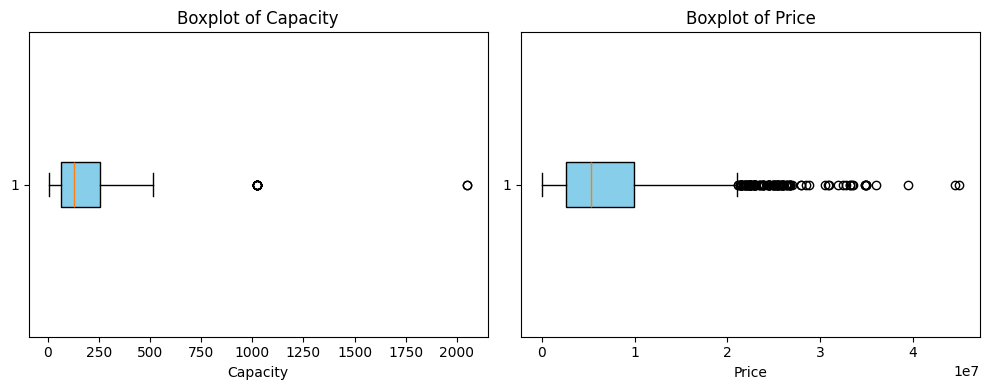

In [23]:
# Số cột
num_cols = len(numeric_df.columns)

# Kích thước biểu đồ
_, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4), sharey=False)

# Nếu chỉ có 1 cột
axes = axes.flatten()

# Vẽ boxplot cho từng cột
for i, col in enumerate(numeric_df.columns):
    axes[i].boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Căn chỉnh khoảng trống giữa các biểu đồ
plt.tight_layout()
plt.show()

#### **Nhận xét:**
**1. Boxplot của Dung lượng:**

**Phân bố lệch phải:** Phân bố lệch phải, với một giá trị ngoại lệ lớn. Điều này cho thấy hầu hết điện thoại có dung lượng tương đối nhỏ, và chỉ có một vài mẫu điện thoại có dung lượng rất lớn. Dữ liệu này có thể bị ảnh hưởng bởi các giá trị ngoại lệ.

**2. Boxplot của Giá:**

**Phân bố lệch phải:** Phân bố giá cũng lệch phải, với nhiều giá trị ngoại lệ ở phía trên. Điều này chỉ ra rằng đa số điện thoại có giá tương đối thấp, và một số ít điện thoại có giá bán rất cao. Sự hiện diện của nhiều giá trị ngoại lệ cho thấy sự khác biệt lớn về giá cả giữa các mẫu điện thoại.

**Tổng kết:**

**Thời gian bảo hành:** Khá đồng đều, tập trung quanh giá trị trung vị.

**Dung lượng:** Lệch phải, với một số ít mẫu có dung lượng rất lớn. Dữ liệu có thể bị ảnh hưởng bởi giá trị ngoại lệ.

**Giá:** Lệch phải, với nhiều giá trị ngoại lệ. Cho thấy sự phân hóa lớn về giá cả sản phẩm, nhiều điện thoại giá rẻ và một số ít điện thoại rất đắt tiền.

In [24]:
numerical_cols = numeric_df.columns.drop('Price')
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

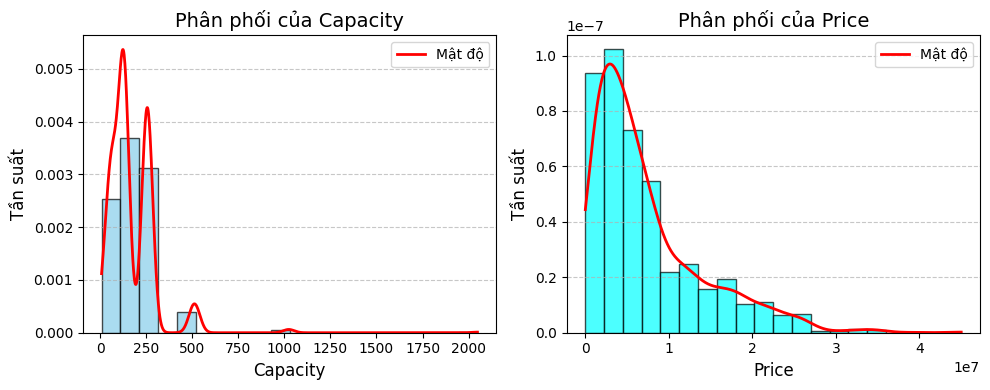

In [25]:
colors = ['skyblue', 'cyan']

# Số cột
num_cols = len(numeric_df.columns)

_, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4), sharey=False)

# Vẽ từng biểu đồ
for i, col in enumerate(numeric_df.columns):
    axes[i].hist(numeric_df[col], bins=20, color=colors[i % len(colors)], alpha=0.7, edgecolor='black', density=True)

    # Tính toán mật độ
    kde = gaussian_kde(numeric_df[col], bw_method='silverman')
    x_vals = np.linspace(numeric_df[col].min(), numeric_df[col].max(), 1000)
    axes[i].plot(x_vals, kde(x_vals), color='red', lw=2, label='Mật độ')

    # Thiết lập nhãn và tiêu đề
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Tần suất', fontsize=12)
    axes[i].set_title(f'Phân phối của {col}', fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=10)

# Căn chỉnh khoảng trống giữa các biểu đồ
plt.tight_layout()
plt.show()


### Nhận xét:

không có gì cái thiện rõ ràng hơn so với trước khi loại bỏ outliers

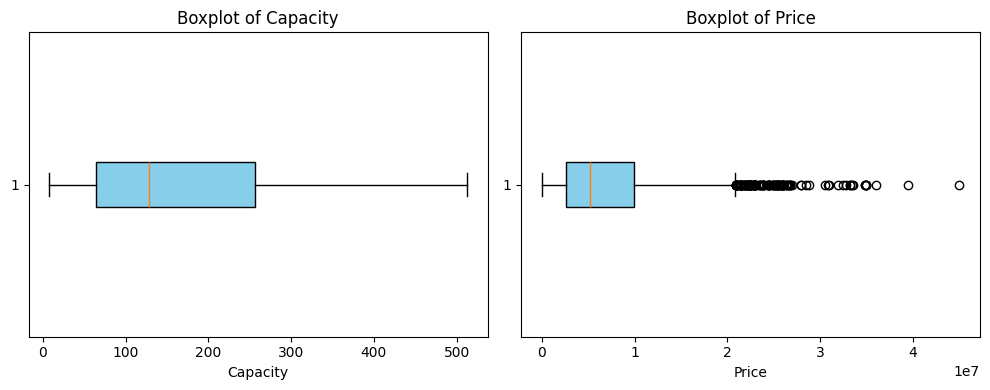

In [26]:
# Số cột
num_cols = len(numeric_df.columns)

# Kích thước biểu đồ
_, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4), sharey=False)

# Nếu chỉ có 1 cột
axes = axes.flatten()

# Vẽ boxplot cho từng cột
for i, col in enumerate(numeric_df.columns):
    axes[i].boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Căn chỉnh khoảng trống giữa các biểu đồ
plt.tight_layout()
plt.show()

#### **Nhận xét:**
**Dung lượng (Capacity):**

**Trước khi loại bỏ outliers:** Phân bố lệch phải với một outlier nằm ở dung lượng rất cao.

**Sau khi loại bỏ outliers:** Outlier dung lượng cao đã được loại bỏ, làm cho phân bố dữ liệu tập trung hơn. Điều này cho thấy phần lớn điện thoại có dung lượng tập trung ở một khoảng nhất định, và dung lượng rất lớn là không phổ biến.

<ipython-input-27-8fe3308efc58>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

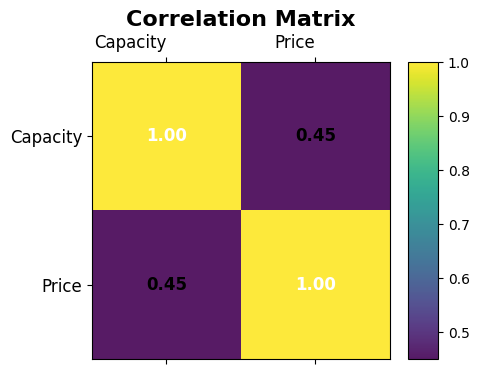

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Tính ma trận tương quan
correlation_matrix = df[numeric_df.columns].corr()

# Tạo figure với kích thước đẹp hơn
plt.figure(figsize=(12, 10))

# Vẽ heatmap với matshow từ matplotlib và bảng màu đẹp hơn
cax = plt.matshow(correlation_matrix, cmap='viridis', alpha=0.9)

# Thêm thanh màu cho heatmap
plt.colorbar(cax, shrink=0.8, aspect=10)

# Thêm nhãn cho các trục
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, ha="right", fontsize=12)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=12)

# Hiển thị giá trị trên heatmap
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    color = 'white' if abs(val) > 0.5 else 'black'  # Thay đổi màu chữ tùy thuộc vào giá trị
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color=color, fontsize=12, fontweight='bold')

# Thêm tiêu đề với kích thước font đẹp hơn
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')

# Tinh chỉnh khoảng cách giữa các đối tượng
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


#### **Nhận xét:**
**Mối tương quan khá giữa giá và dung lượng:** Hệ số tương quan giữa "Giá" và "Dung lượng" là 0.45, cho thấy mối tương quan trung bình khá. Điều này có nghĩa là dung lượng lưu trữ càng lớn thì giá cả càng có xu hướng cao hơn.



In [28]:
correlation_matrix # các biến số có hệ số tương quan cao

,Capacity,Price
Capacity,1.000000,0.450739
Price,0.450739,1.000000


In [29]:
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlation with price:\n", correlation_with_price)

Correlation with price:
 Price       1.000000
Capacity    0.450739
Name: Price, dtype: float64


In [30]:
# Phân tích ANOVA cho các biến phân loại
categorical_columns = ['Brand','Name','Status','Color','Origin','Location', 'Guarantee']
anova_results = {}
for column in categorical_columns:
    groups = []
    for category in df[column].unique():
        group = df['Price'][df[column] == category]
        groups.append(group)
    anova_results[column] = stats.f_oneway(*groups)

In [31]:
# Hiển thị kết quả ANOVA
anova_df = pd.DataFrame({
    'Variable': list(anova_results.keys()),
    'F-statistic': [result.statistic for result in anova_results.values()],
    'p-value': [result.pvalue for result in anova_results.values()]
})
print(anova_df)

    Variable  F-statistic       p-value
0      Brand    15.802886  1.216839e-64
1       Name    43.840327  0.000000e+00
2     Status    16.835215  5.497156e-08
3      Color    10.192652  3.006558e-21
4     Origin    14.748932  1.630116e-23
5   Location     2.337143  4.997307e-06
6  Guarantee    49.828682  8.886598e-75


In [32]:
# Trích xuất các biến quan trọng dựa trên tương quan và ANOVA
important_numerical_variables = correlation_with_price[correlation_with_price.abs() > 0.5].index.tolist()
important_anova_variables = anova_df[anova_df['p-value'] < 0.05]['Variable'].tolist()
important_variables = important_numerical_variables + important_anova_variables

print("Important variables based on correlation:", important_numerical_variables)
print("Important variables based on ANOVA:", important_anova_variables)
print("Important variables:", important_variables)

Important variables based on correlation: ['Price']
Important variables based on ANOVA: ['Brand', 'Name', 'Status', 'Color', 'Origin', 'Location', 'Guarantee']
Important variables: ['Price', 'Brand', 'Name', 'Status', 'Color', 'Origin', 'Location', 'Guarantee']
